*Group Members*: 

- Nabil Arrouss (qup85ses) 
- Ahmad Pamir Sahak (las06weq) 
- Kohei Fujimura (koj66veq) 
- Heydar Bagloo ( yeq42hip) 

In [1]:
from os.path import dirname, abspath
from os.path import join
import PIL
from PIL.Image import open, new, fromarray
from PIL.ImageOps import expand
from matplotlib.pyplot import savefig, imshow, set_cmap
import matplotlib.pyplot as plt
import numpy as np

from numpy import linalg as LA

# Load CBCL Faces Dataset

In [2]:
import scipy.io

mat = scipy.io.loadmat('./X.mat')
print(mat['X'].shape)
dataset = mat['X']
print(dataset.shape)


(2429, 361)
(2429, 361)


## Visualize some faces

In [3]:
def visualize(faces):
    n = 16
    fig, axs = plt.subplots(n, n, figsize=(19, 19))
    for i in range(n*n):
        ax = axs[i//n, i%n]
        ax.imshow(faces[i,:].reshape(19, 19).T, cmap='gray')
        ax.axis('off')

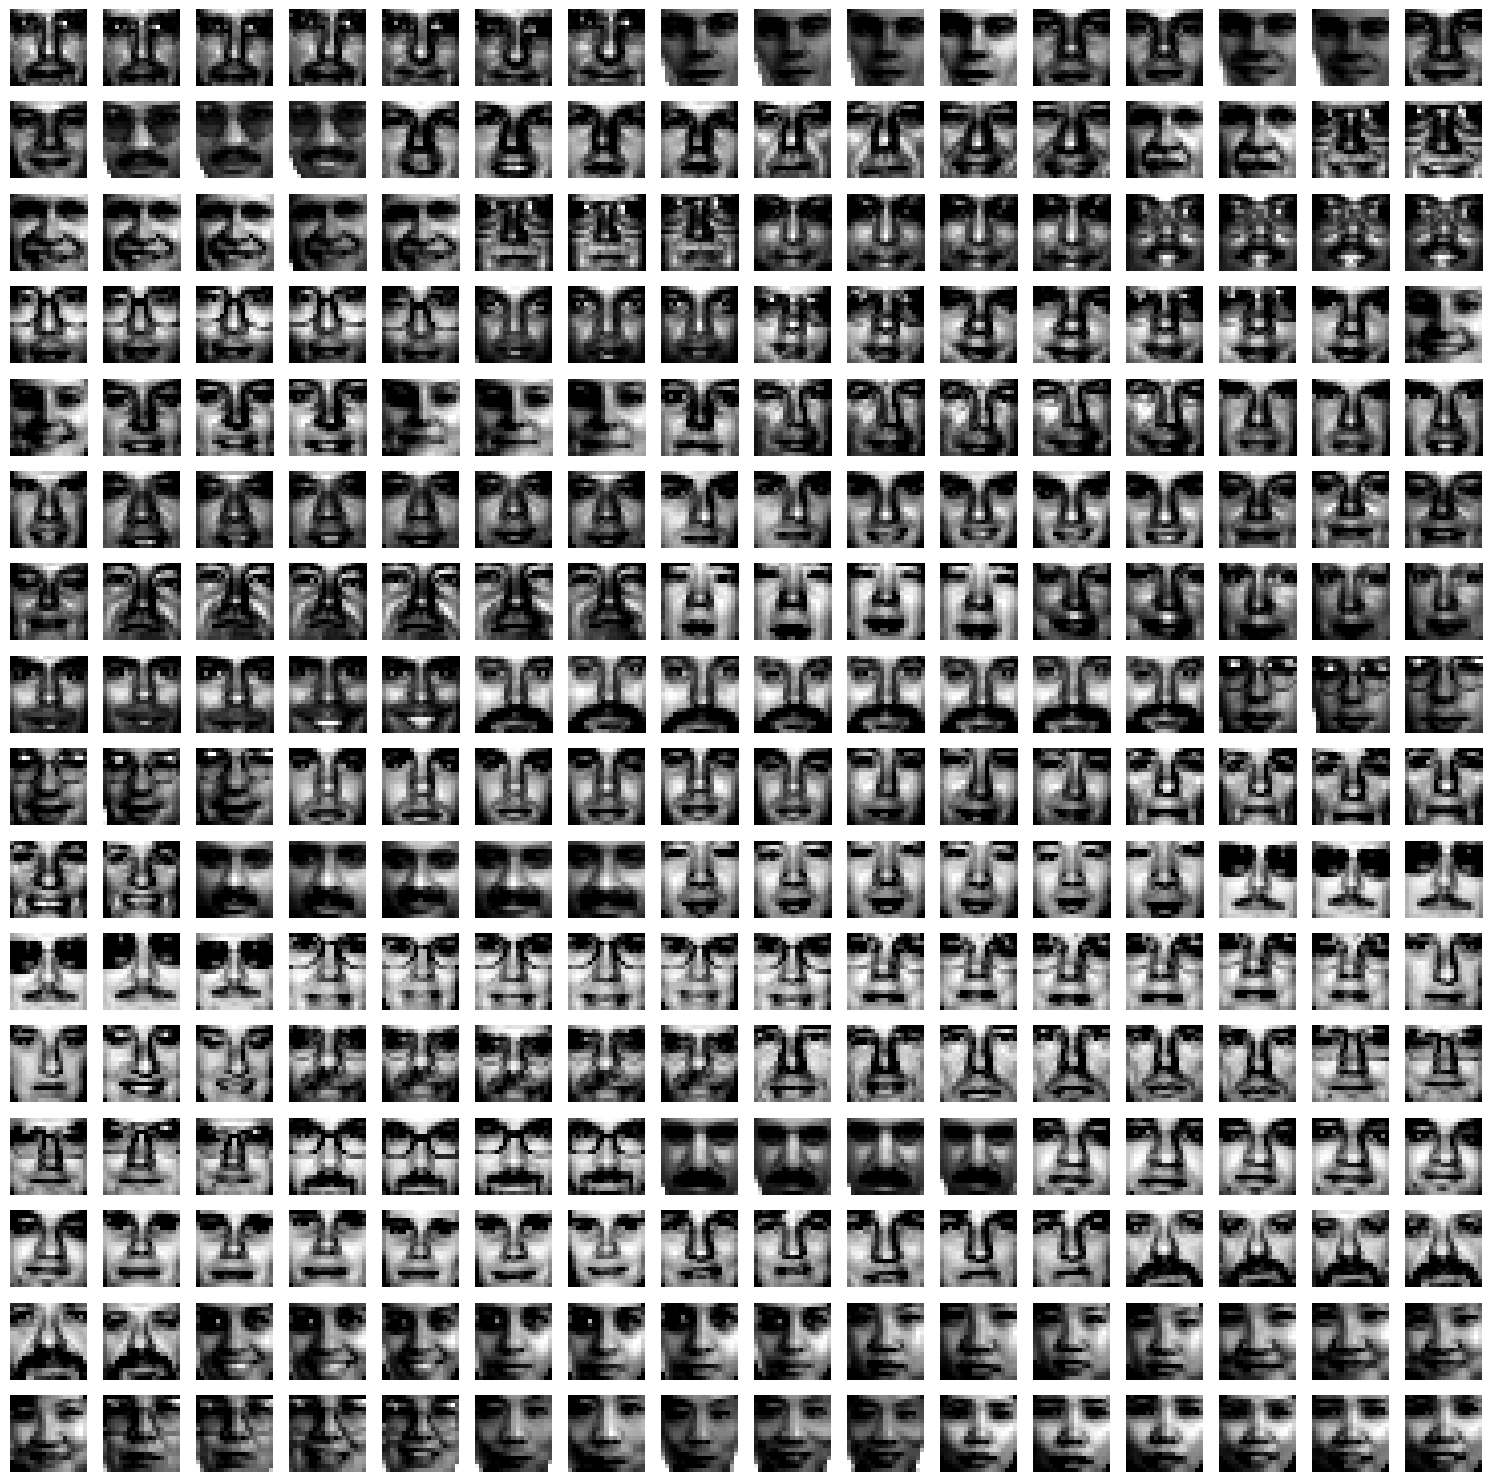

In [4]:
visualize(dataset)

In [5]:
def NMF(A):
    nr_iterations = 1000
    alpha = 1e-3
    r = 256   # IMPORTANT for visualize()

    W = 0.01 * np.random.rand(A.shape[0], r)
    H = 0.01 * np.random.rand(r, A.shape[1])


    for i in range(nr_iterations):
        if i % 20 == 0:
            print(f"iteration {i}, error: {LA.norm(A - W @ H):.4f}")

        grad_W = 2 * (W @ H - A) @ H.T
        grad_H = 2 * W.T @ (W @ H - A)

        W = np.maximum(W - alpha * grad_W, 0)
        H = np.maximum(H - alpha * grad_H, 0)

    return W, H


In [6]:
W,H = NMF(dataset)

iteration 0, error: 318.9234
iteration 20, error: 158.7648
iteration 40, error: 149.8112
iteration 60, error: 128.0068
iteration 80, error: 115.7082
iteration 100, error: 105.6989
iteration 120, error: 97.8856
iteration 140, error: 91.2733
iteration 160, error: 85.5687
iteration 180, error: 80.6051
iteration 200, error: 76.3032
iteration 220, error: 72.5793
iteration 240, error: 69.3350
iteration 260, error: 66.5093
iteration 280, error: 64.0363
iteration 300, error: 61.8646
iteration 320, error: 59.9511
iteration 340, error: 58.2567
iteration 360, error: 56.7445
iteration 380, error: 55.3893
iteration 400, error: 54.1680
iteration 420, error: 53.0610
iteration 440, error: 52.0547
iteration 460, error: 51.1371
iteration 480, error: 50.2978
iteration 500, error: 49.5277
iteration 520, error: 48.8179
iteration 540, error: 48.1628
iteration 560, error: 47.5548
iteration 580, error: 46.9892
iteration 600, error: 46.4624
iteration 620, error: 45.9700
iteration 640, error: 45.5082
iteration 

In [7]:
print(f"W.shape = {W.shape}, H.shape = {H.shape}")

W.shape = (2429, 256), H.shape = (256, 361)


## Face parts

The matrix H consists after optimization of face parts and each face in the dataset is a positive combination of those.

Let us visualize some entries of H.

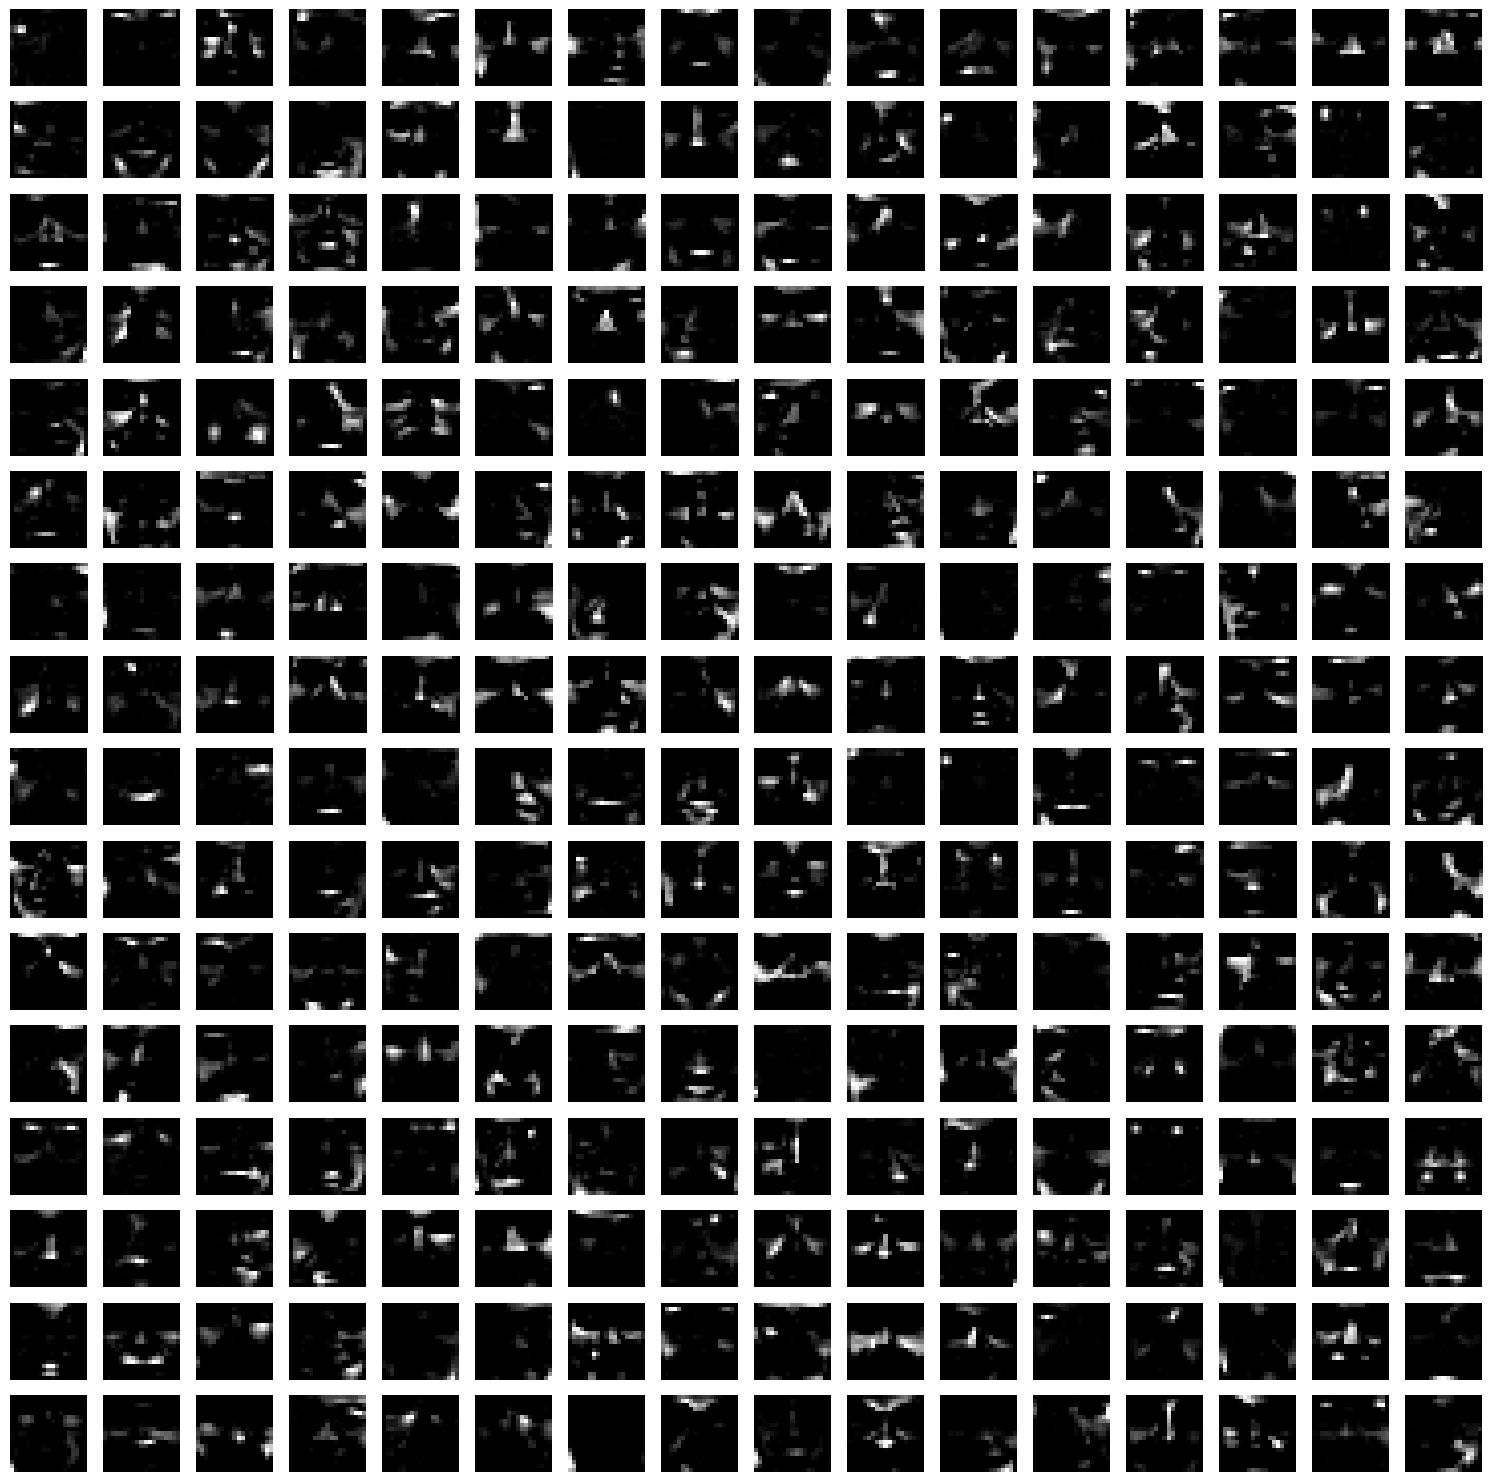

In [8]:
visualize(H)

## Reconstruction

Let us reconstruct the first face in the dataset given the NMF.

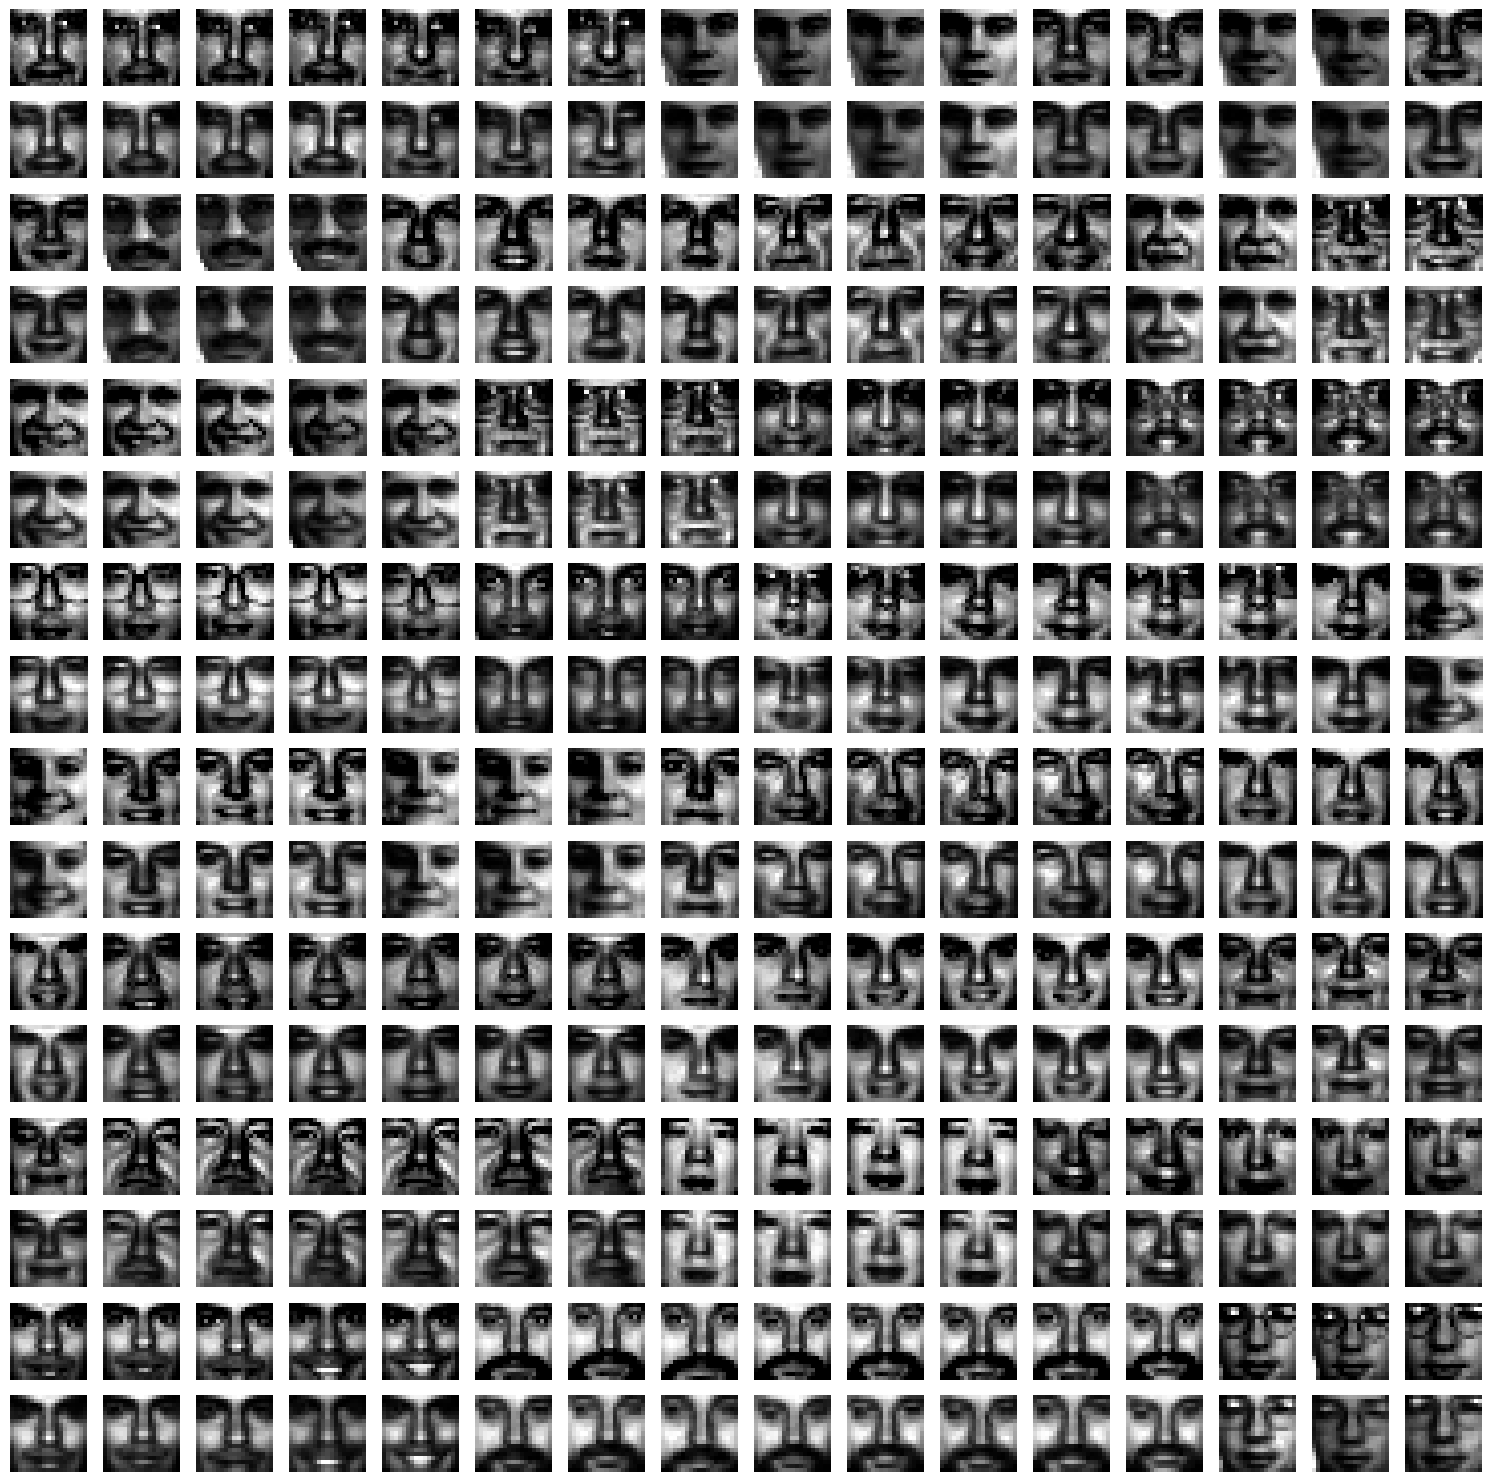

In [9]:
n = 16
fig, axs = plt.subplots(n, n, figsize=(19, 19))
for i in range(n*(n//2)):
    face = dataset[i,:].reshape(19, 19).T
    recon = (W[i,:] @ H).reshape(19, 19).T

    ax = axs[i//n * 2, i%(n)]
    ax.imshow(face, cmap='gray')
    ax.axis('off')
    ax = axs[i//n * 2 + 1, i%(n)]
    ax.imshow(recon, cmap='gray')
    ax.axis('off')